In [1]:
# Packages
import h5py
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt

In [2]:
def plot_moon(moon, path, tidal=False, kozai=False):
    
    if kozai:
        name = 'k.hdf5'
        total_name = path+moon+'_'+name
        res = h5py.File(total_name)
    if tidal:
        total_name = path+'tidal_'+moon+'.hdf5'
        res = h5py.File(total_name)
    
    #if moon=='io':
    #    res = h5py.File(path+'io_'+ name)
    #if moon=='eu':
    #    res = h5py.File(path+'eu_'+ name)
    #if moon=='ga':
    #    res = h5py.File(path+'ga_'+ name)
    #if moon=='ca':
    #    res = h5py.File(path+'ca_'+ name)
    #    if tidal:
    #        res = h5py.File(path+name)

    ecc = res['ecc'][:]
    inc = res['inc'][:]
    sma = res['sma'][:]
    time_range = res['time'][:]

    plt.rcParams.update({'font.size': 20})
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=[20, 15], tight_layout=True)
    colours = ['r', 'g', 'b', 'm']

    ax1.plot(time_range, inc, color=colours[0], label=moon)   
    ax1.set_ylabel('Inc [deg]')
    ax1.set_xlabel('t [yr]')
    ax1.legend()

    ax2.plot(time_range, ecc, color=colours[1], label=moon)   
    ax2.set_ylabel('Ecc')
    ax2.set_xlabel('t [yr]')
    ax2.legend()

    ax3.plot(time_range, sma, color=colours[2], label=moon)   
    ax3.set_ylabel('SMA')
    ax3.set_xlabel('t [yr]')
    ax3.legend()
    
    porb = np.array(sma) * (1-np.array(ecc))
    ax4.plot(time_range, porb, color=colours[3], label=moon)
    ax4.set_ylabel('Periapsis')
    ax4.set_xlabel('t [yr]')

    res.close()
    plt.show()

<ipython-input-2-e53b0f90e0c4>:9: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  res = h5py.File(total_name)


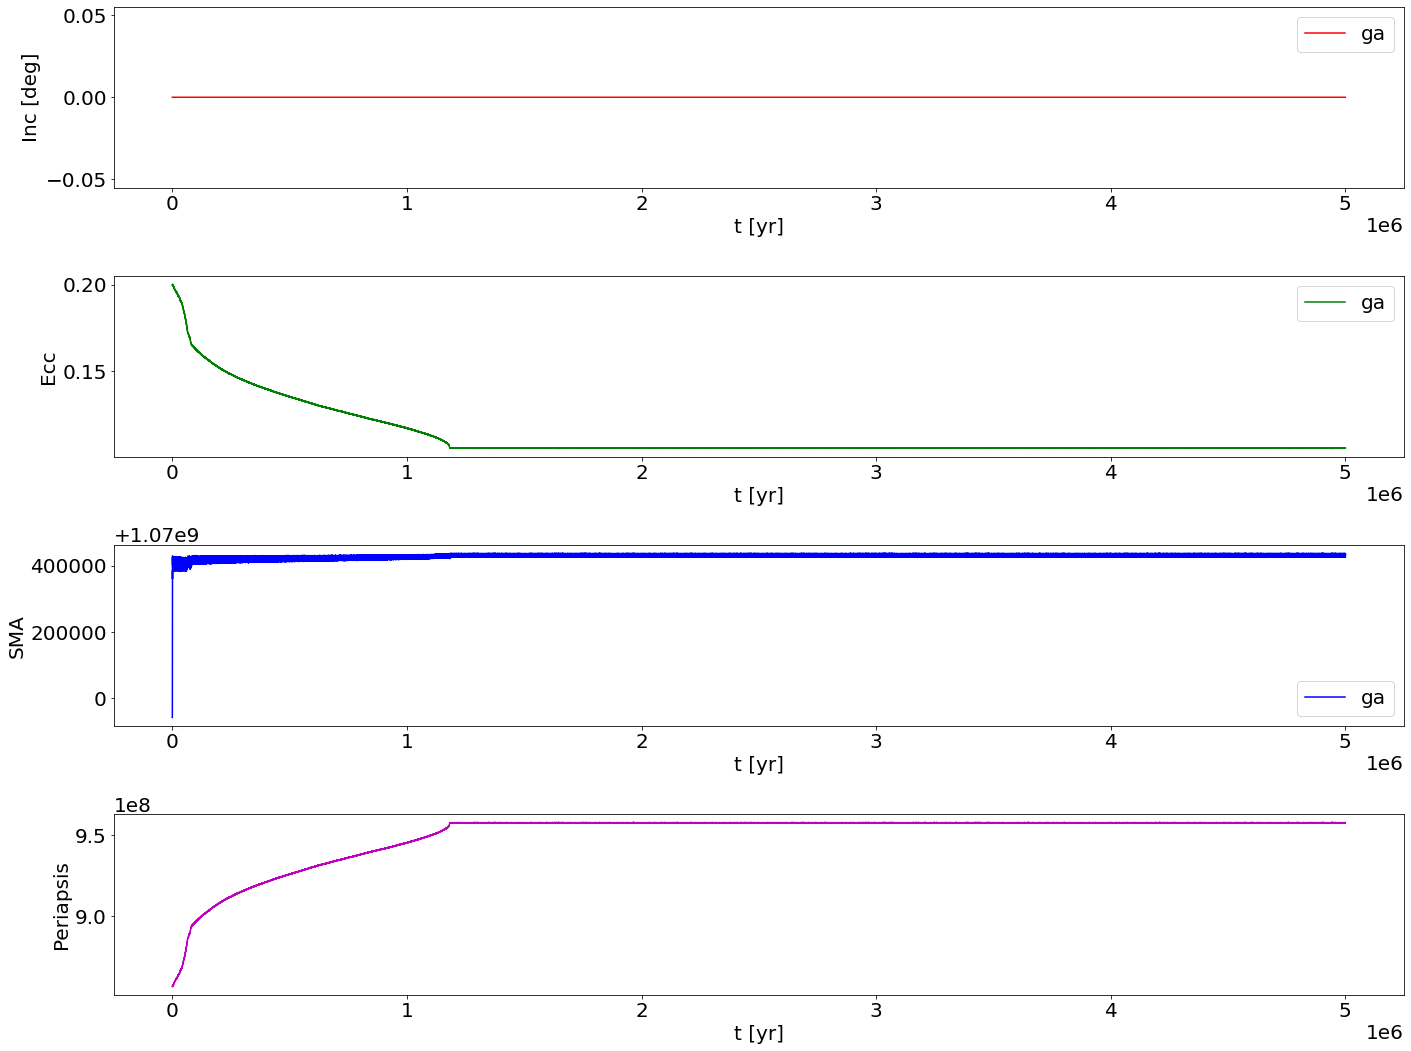

In [4]:
path = 'new_data/' #this should work on all machines as long as all the data remains in the new_data directory
plot_moon('ga', path=path, tidal=True, kozai=False)

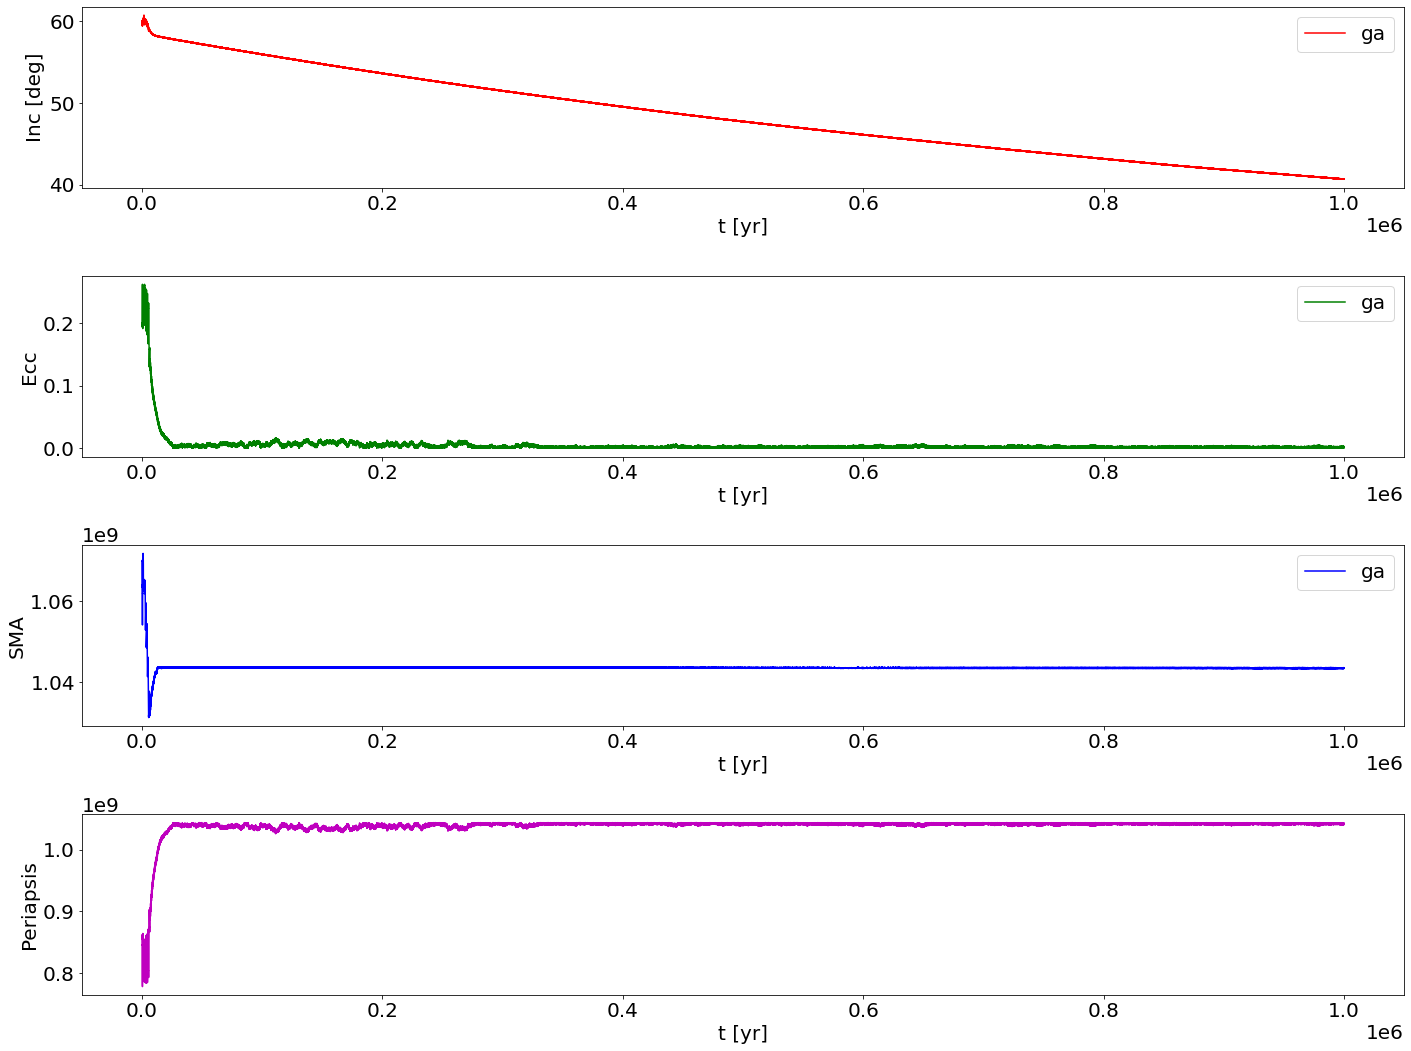

In [42]:
path = '/home/astrobrez/Amuse-env/amuse-project/new_data/'
name = 'ga.hdf5'
res = h5py.File(path+name)

moon = 'ga'
inc = res['inc'][:]
ecc = res['ecc'][:]
sma = res['sma'][:]
time_range = res['time'][:]

plt.rcParams.update({'font.size': 20})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=[20, 15], tight_layout=True, facecolor='w')
colours = ['r', 'g', 'b', 'm']

ax1.plot(time_range, inc, color=colours[0], label=moon)   
ax1.set_ylabel('Inc [deg]')
ax1.set_xlabel('t [yr]')
ax1.legend()

ax2.plot(time_range, ecc, color=colours[1], label=moon)   
ax2.set_ylabel('Ecc')
ax2.set_xlabel('t [yr]')
ax2.legend()

ax3.plot(time_range, sma, color=colours[2], label=moon)   
ax3.set_ylabel('SMA')
ax3.set_xlabel('t [yr]')
ax3.legend()

porb = np.array(sma) * (1-np.array(ecc))
ax4.plot(time_range, porb, color=colours[3], label=moon)
ax4.set_ylabel('Periapsis')
ax4.set_xlabel('t [yr]')

res.close()
plt.show()

In [40]:
def plot_params(name):
    
    path = '/home/astrobrez/Amuse-env/amuse-project/new_data/'
    res = h5py.File(path+name)

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(20, 15), tight_layout=True, facecolor='w')
    
    moons = list(res.keys())
    props = list(res[moons[0]].keys())
    time = res[moons[0]][props[3]][:]
    
    for i in range(4):

        ecc = res[moons[i]][props[0]][:]
        inc = res[moons[i]][props[1]][:]
        sma = res[moons[i]][props[2]][:]

        ax1.plot(time, ecc, label=moons[i])
        ax2.plot(time, inc, label=moons[i])
        ax3.plot(time, sma, label=moons[i])
        
        ax1.set_ylabel('ecc')
        ax2.set_ylabel('inc')
        ax3.set_ylabel('sma')
        
        ax1.set_xlim([0,3000])
        ax2.set_xlim([0,3000])
        ax3.set_xlim([0,3000])
        
        ax1.set_ylim([0,1])
        ax2.set_ylim([0,120])
        ax3.set_ylim([0,5e9])
        
        ax3.set_xlabel('t [yr]')
        
        ax1.legend()
        ax2.legend()
        ax3.legend()
        
    
    plt.show()

    res.close()

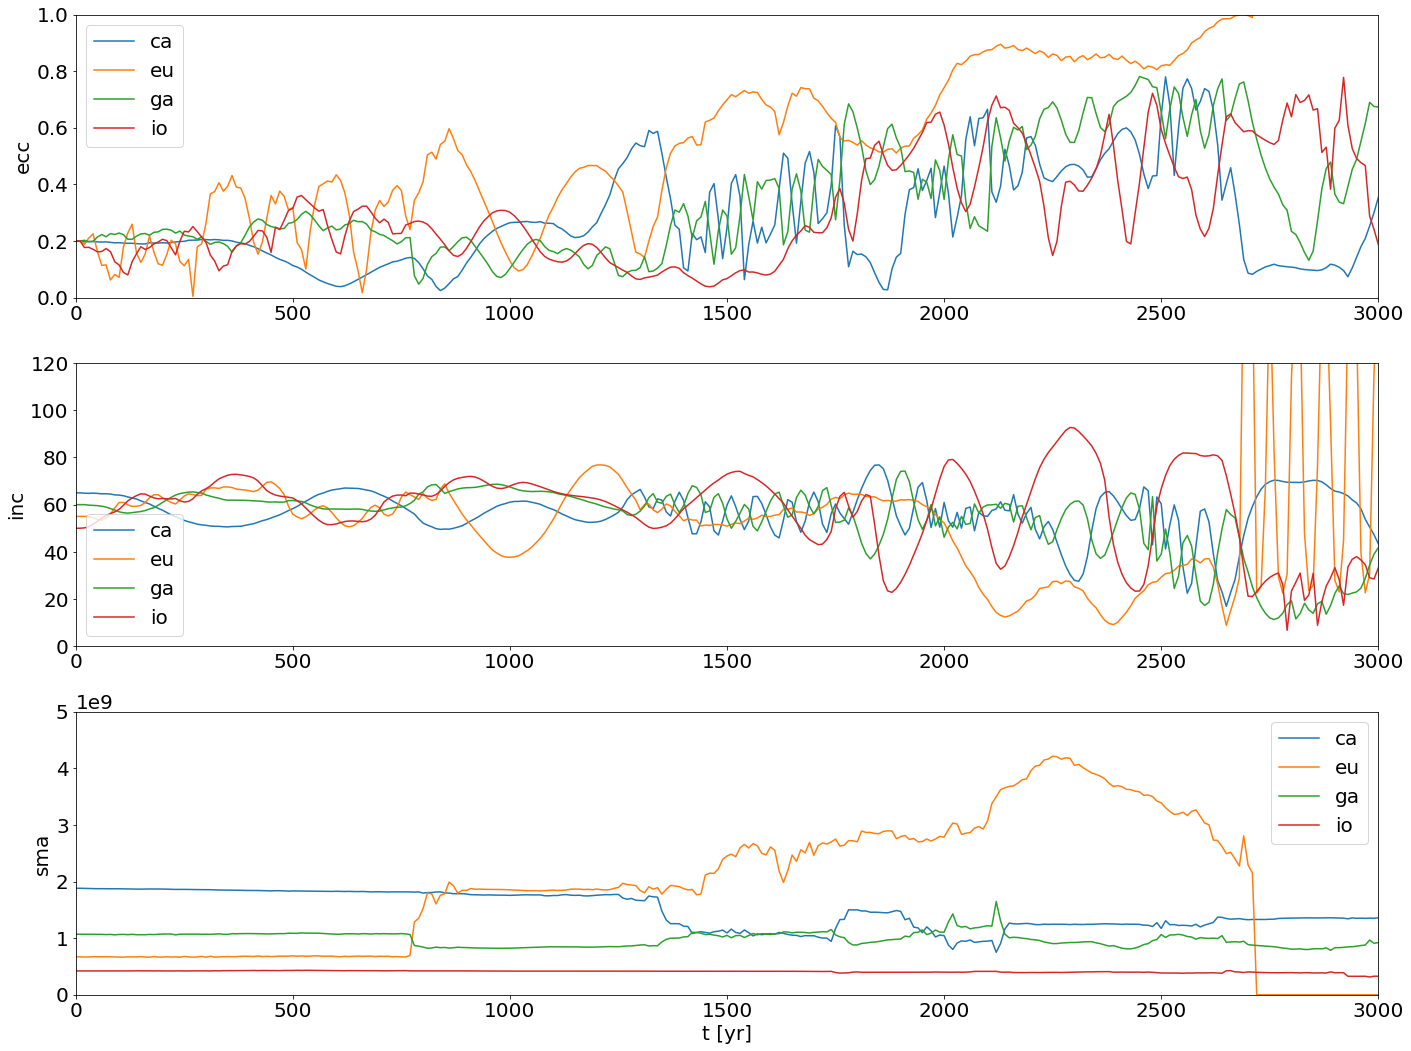

In [41]:
plot_params('full_system.hdf5')